# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'> Multiclass Classification using CNN with TensorFlow </div></b>

![](https://img.freepik.com/free-vector/kids-playing-rock-scissors-paper_1308-5838.jpg?w=900&t=st=1686054162~exp=1686054762~hmac=bb8f147b3ab5fa88cba60e4553cddc1488186d08112e57689405caaef31a705d)

Hi guys 😀 This notebook walks you through how to classify rock-paper-scissors images with TensorFlow.

Table of contents:
<ul>
<li><a href="#importing">Importing required libraries </a></li>  
<li><a href="#understanding">Understanding the dataset</a></li>         
<li><a href="#preprocessing">Data preprocessing</a></li>
<li><a href="#configure">Configure the dataset for performance</a></li>
<li><a href="#resizing">Resizing & rescaling</a></li>
<li><a href="#augmentation">Data augmentation</a></li>
<li><a href="#building">Building the model </a></li>
<li><a href="#compiling">Compiling the model </a></li>
<li><a href="#visualizing">Visualizing training results</a></li>
<li><a href="#predicting">Predicting on new data</a></li>   
<li><a href="#wrapup">Wrap up</a></li>   
</ul>

Let's get started 🚀

<a id='importing'></a>
# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Importing Required Libraries </div></b>

In [1]:
import os 
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.utils import load_img, img_to_array
print("TensorFlow version: ", tf.__version__)
import numpy as np
import random
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

TensorFlow version:  2.12.0


<a id='understanding'></a>
# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Understanding the Dataset</div></b>

In [2]:
base_dir = '/kaggle/input/rockpaperscissors/rps-cv-images'
paper_dir = os.path.join(base_dir,'paper')
rock_dir = os.path.join(base_dir,'rock')
scissors_dir = os.path.join(base_dir,'scissors')

In [3]:
print("Rock : ",len(os.listdir(rock_dir)))
print("Paper : ",len(os.listdir(paper_dir)))
print("Scissors : ",len(os.listdir(scissors_dir)))

Rock :  726
Paper :  712
Scissors :  750


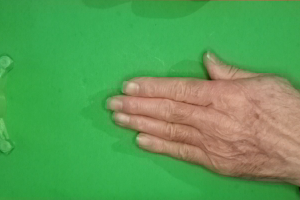

In [4]:
random_image = random.sample(os.listdir(paper_dir), 1)
img = load_img(f"{paper_dir}/{random_image[0]}")
img

In [5]:
img = img_to_array(img)
img.shape

(200, 300, 3)

<a id='preprocessing'></a>
# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Data Preprocessing</div></b>

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  base_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  batch_size=32)

Found 2188 files belonging to 3 classes.
Using 1751 files for training.


In [7]:
class_names = train_ds.class_names
print(class_names)

['paper', 'rock', 'scissors']


In [8]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  base_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  batch_size=32)

Found 2188 files belonging to 3 classes.
Using 437 files for validation.


In [9]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 256, 256, 3)
(32,)


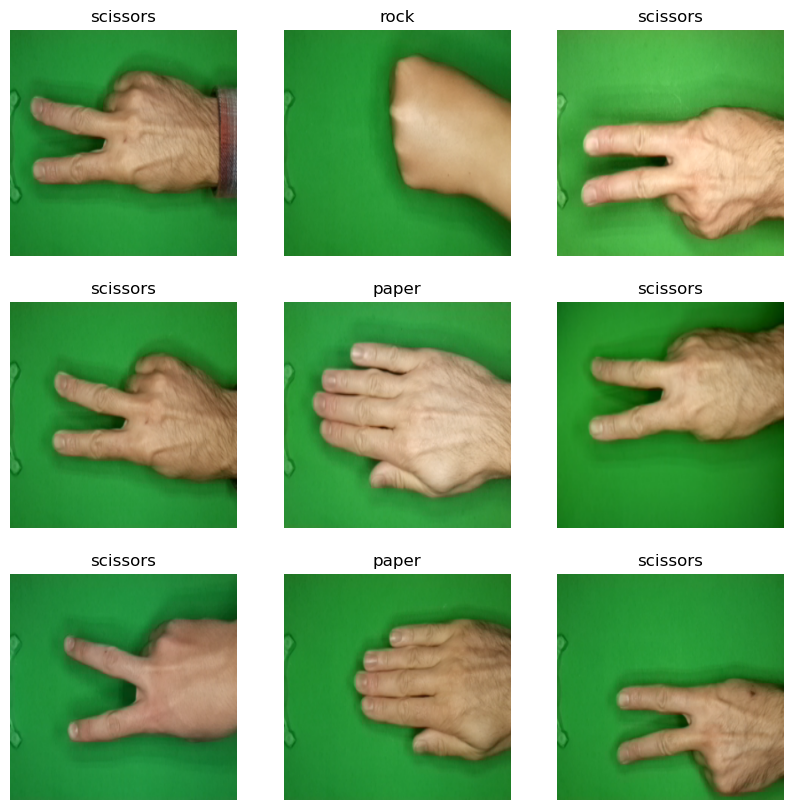

In [10]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

<a id='configure'></a>
# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Configuring the Dataset for Performance</div></b>

In [11]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

<a id='resizing'></a>
# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Resizing & Rescaling</div></b>

In [12]:
IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

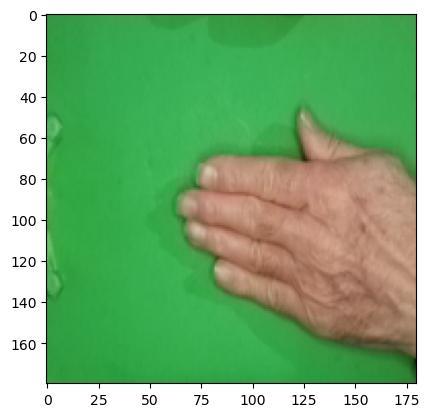

In [13]:
import matplotlib.pyplot as plt
result = resize_and_rescale(img)
_ = plt.imshow(result)

<a id='augmentation'></a>
# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Data Augmentation </div></b>

In [14]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical", seed=42),
  layers.RandomRotation(0.1, seed=42),
])

In [15]:
# Add the image to a batch.
image = tf.cast(tf.expand_dims(img, 0), tf.float32)

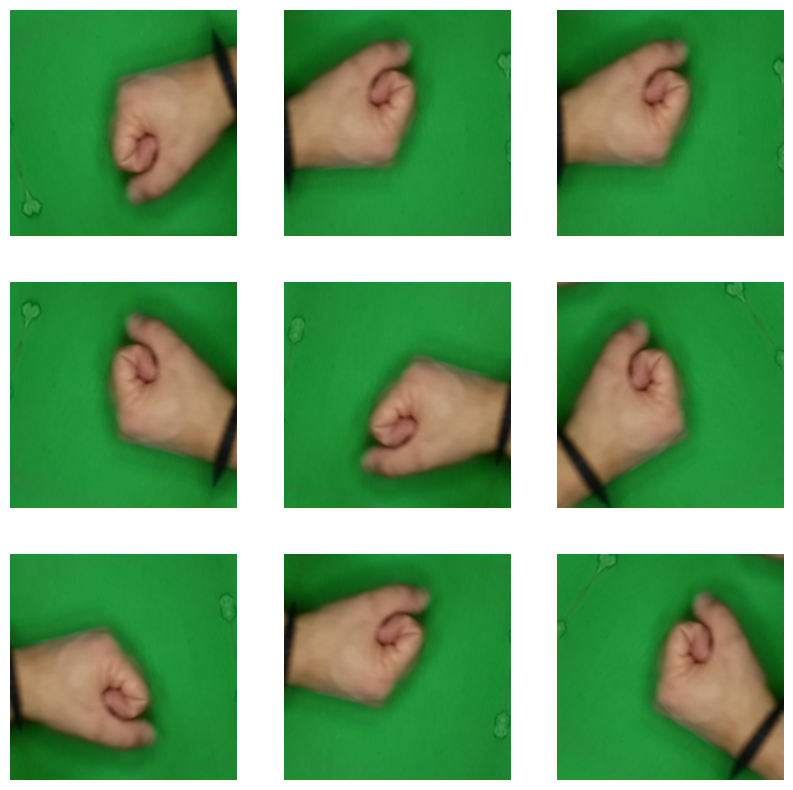

In [16]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

<a id='building'></a>
# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Building the Model</div></b>

In [17]:
num_classes = len(class_names)
model = tf.keras.Sequential([
  resize_and_rescale,
  data_augmentation,
  layers.Conv2D(128, 3, padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [18]:
input_shape = image_batch.shape
model.build(input_shape) 
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (180, 180, 3)             0         
                                                                 
 sequential_1 (Sequential)   (32, None, None, 3)       0         
                                                                 
 conv2d (Conv2D)             (32, 180, 180, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (32, 90, 90, 128)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 90, 90, 128)         147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 45, 45, 128)        0         
 2D)                                                  

<a id='compiling'></a>
# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Compiling the Model </div></b>

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [21]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[callback],
)

Epoch 1/20
55/55 [==============================] - 16s 106ms/step - loss: 1.1029 - accuracy: 0.3792 - val_loss: 1.0422 - val_accuracy: 0.5309
Epoch 2/20
55/55 [==============================] - 3s 58ms/step - loss: 0.6027 - accuracy: 0.7510 - val_loss: 0.4925 - val_accuracy: 0.7620
Epoch 3/20
55/55 [==============================] - 3s 57ms/step - loss: 0.3786 - accuracy: 0.8567 - val_loss: 0.2143 - val_accuracy: 0.9222
Epoch 4/20
55/55 [==============================] - 3s 57ms/step - loss: 0.3184 - accuracy: 0.8812 - val_loss: 0.1944 - val_accuracy: 0.9359
Epoch 5/20
55/55 [==============================] - 3s 57ms/step - loss: 0.2565 - accuracy: 0.8983 - val_loss: 0.1785 - val_accuracy: 0.9382
Epoch 6/20
55/55 [==============================] - 3s 58ms/step - loss: 0.2190 - accuracy: 0.9235 - val_loss: 0.0978 - val_accuracy: 0.9703
Epoch 7/20
55/55 [==============================] - 3s 57ms/step - loss: 0.2086 - accuracy: 0.9286 - val_loss: 0.1063 - val_accuracy: 0.9634
Epoch 8/20


<a id='visualizing'></a>
# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Visualizing Training Results</div></b>

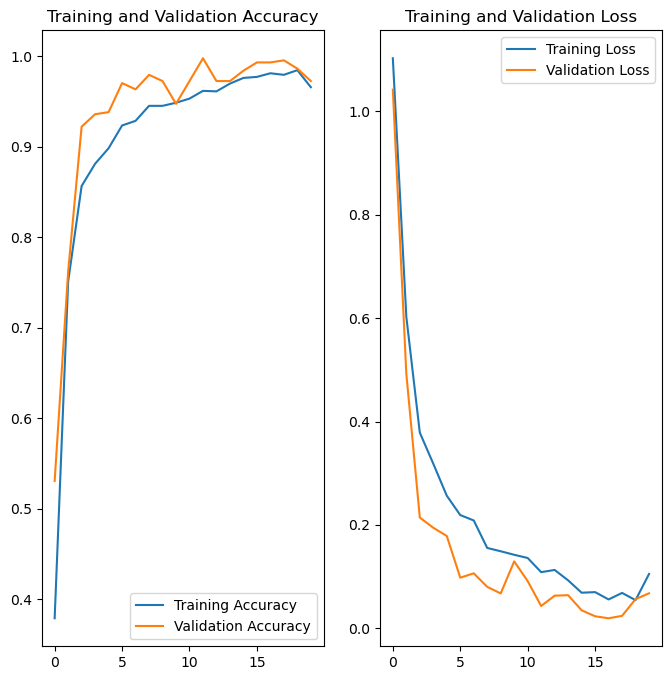

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

#epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

<a id='predicting'></a>
# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Predicting on New Data</div></b>

In [23]:
random_image = random.sample(os.listdir(paper_dir), 1)
img = load_img(f"{paper_dir}/{random_image[0]}")

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


1/1 [==============================] - 0s 270ms/step
This image most likely belongs to rock with a 65.20 percent confidence.


<a id='wrapup'></a>
# <b><div style='padding:15px;background-color:#850E35;color:white;border-radius:2px;font-size:110%;text-align: center'>Wrap-Up </div></b>

In this notebook, we've seen how to perform multiclass image classification. To do this, we've used Keras and TensorFlow. Finally, we discussed how to predict a new data.

Thanks for taking the time! If you enjoyed it, please consider upvoting.

🔗 Let's connect [YouTube](http://youtube.com/tirendazacademy) | [Medium](http://tirendazacademy.medium.com) | [Twitter](http://twitter.com/tirendazacademy) | [Instagram](https://www.instagram.com/tirendazacademy) | [Linkedin](https://www.linkedin.com/in/tirendaz-academy) 😎